<h1 style='text-align: center'><strong>Random Forest</strong></h1>
<h3 style='text-align: center'>Machine learning</h3>
<h5 style='text-align: center'><a href='https://github.com/AlvaroVasquezAI'>Álvaro Vásquez AI</a></h5>

<div style='text-align: center'>
    <a href='https://github.com/AlvaroVasquezAI'><img src='https://img.icons8.com/color/48/000000/github--v1.png'/></a>
    <a href='https://www.linkedin.com/in/%C3%A1lvaro-garc%C3%ADa-v%C3%A1squez-8a2a001bb/'><img src='https://img.icons8.com/color/48/000000/linkedin.png'/></a>
    <a href='https://www.instagram.com/alvarovasquez.ai'><img src='https://img.icons8.com/color/48/000000/instagram-new--v1.png'/></a>
    <a href='https://twitter.com/alvarovasquezai'><img src='https://img.icons8.com/color/48/000000/twitter--v1.png'/></a>
    <a href='https://www.youtube.com/channel/UCd8GEklq1EbrxGQYK0CXDTA'><img src='https://img.icons8.com/color/48/000000/youtube-play.png'/></a>
    <a href='mailto: agarciav2102@alumno.ipn.mx'><img src='https://img.icons8.com/color/48/000000/email.png'/></a>
</div>

<h2 style='text-align: center'><strong>Adult Income Classification</strong></h2>

<h4 style='text-align: center'>Using Random Forest</h4>

<div>
    <h3><strong>Table of contents</strong></h3>
    <ol>
        <li><a href="#Introduction">Introduction</a></li>
        <li><a href="#Libraries">Libraries</a></li>
        <li><a href="#Dataset">Dataset</a></li>
        <li><a href="#Features">Features</a></li>
        <li><a href="#Splitting-the-dataset">Splitting the dataset</a></li>
        <li><a href="#Random-Forest-Classifier-Model">Random Forest Classifier Model</a></li>
        <li><a href="#Classification">Classification</a></li>
        <li><a href="#Evaluation">Evaluation</a></li>
        <li><a href="#EasyExampleWithVideo">Easy Example With Video</a></li>
    </ol>
</div>

<h2 style='text-align: center' id='Introduction'><strong>1. Introduction</strong></h2>
Random Forest is an ensemble learning method that constructs multiple decision trees during training and outputs the mode of the classes for classification tasks. It is a powerful and versatile machine learning algorithm capable of performing both classification and regression tasks. 

In this notebook, we will demonstrate the use of Random Forests to classify income levels from the Adult Income dataset. This dataset includes demographic information about individuals and the goal is to predict whether a person earns more than $50,000 a year based on their attributes.


<h2 style='text-align: center' id='Libraries'><strong>2. Libraries</strong></h2>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

- **pandas**: For data manipulation and analysis.
- **numpy**: For numerical operations.
- **train_test_split from sklearn.model_selection**: To split the dataset into training and testing sets.
- **RandomForestClassifier from sklearn.ensemble**: To create and train the Random Forest classifier model.
- **classification_report and accuracy_score from sklearn.metrics**: To evaluate the model's performance.
- **matplotlib.pyplot**: For plotting the results.

<h2 style='text-align: center' id='Dataset'><strong>3. Dataset</strong></h2>

The Adult Income dataset contains demographic information about individuals and their income levels. The goal is to predict whether a person earns more than $50,000 a year.


In [2]:
# Load the Adult Income dataset
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", 
                "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", 
                "hours_per_week", "native_country", "income"]
df = pd.read_csv(data_url, names=column_names, sep=',', na_values=" ?", skipinitialspace=True)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


- **data_url**: URL to download the dataset from the UCI Machine Learning Repository.
- **column_names**: List of column names for the dataset.
- **pd.read_csv(data_url, names=column_names, sep=',', na_values=" ?", skipinitialspace=True)**: Reads the dataset into a DataFrame `df`, handling missing values and initial spaces.


<h2 style='text-align: center' id='Features'><strong>4. Features</strong></h2>

In [3]:
# Preprocess the data
df = df.dropna()
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Select the features and target variable
X = df.drop('income', axis=1)
X = pd.get_dummies(X)
y = df['income']

In [4]:
X

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,40,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32557,40,154374,9,0,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32558,58,151910,9,0,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32559,22,201490,9,0,0,20,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [5]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: int64

- **df.dropna()**: Removes rows with missing values.
- **df['income'].apply(lambda x: 1 if x == '>50K' else 0)**: Converts the income column to binary labels.
- **X = df.drop('income', axis=1)**: Selects all features except the target variable (income).
- **X = pd.get_dummies(X)**: Converts categorical features to dummy/indicator variables.
- **y = df['income']**: Selects the income column as the target variable.


<h2 style='text-align: center' id='Splitting-the-dataset'><strong>5. Splitting the dataset</strong></h2>

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- **train_test_split(X, y, test_size=0.2, random_state=42)**: Splits the data into training and testing sets. 80% of the data is used for training (`X_train` and `y_train`), and 20% is used for testing (`X_test` and `y_test`).
- **test_size=0.2**: Specifies that 20% of the data should be used for testing.
- **random_state=42**: Ensures reproducibility by setting a random seed.

<h2 style='text-align: center' id='Random-Forest-Classifier-Model'><strong>6. Random Forest Classifier Model</strong></h2>

In [7]:
# Create and train the Random Forest classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

- **model = RandomForestClassifier(n_estimators=100, random_state=42)**: Initializes the Random Forest classifier model with 100 decision trees and a random seed for reproducibility.
- **model.fit(X_train, y_train)**: Trains the model using the training data (`X_train` and `y_train`).


<h2 style='text-align: center' id='Classification'><strong>7. Classification</strong></h2>

In [8]:
# Make predictions
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

- **y_pred = model.predict(X_test)**: Uses the trained model to make predictions on the testing data (`X_test`).


<h2 style='text-align: center' id='Evaluation'><strong>8. Evaluation</strong></h2>


              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4942
           1       0.74      0.64      0.69      1571

    accuracy                           0.86      6513
   macro avg       0.82      0.78      0.80      6513
weighted avg       0.85      0.86      0.86      6513



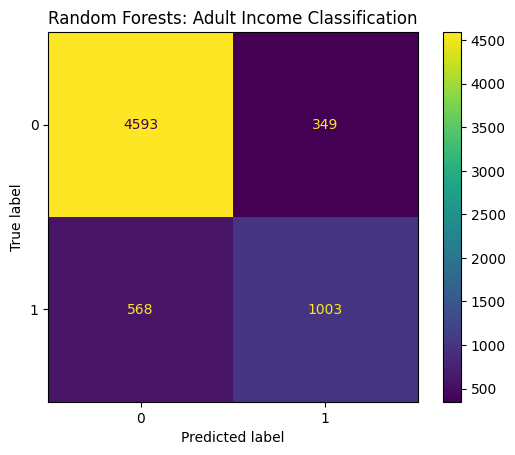

Accuracy: 0.86


In [9]:
# Print the classification report
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title('Random Forests: Adult Income Classification')
plt.show()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

- **print(classification_report(y_test, y_pred))**: Generates a classification report showing precision, recall, and F1-score for each class.
- **ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)**: Plots the confusion matrix for the predictions.
- **accuracy_score(y_test, y_pred)**: Calculates the accuracy of the model on the testing data.
- **print(f'Accuracy: {accuracy:.2f}')**: Prints the accuracy of the model.

<h2 style='text-align: center' id='EasyExampleWithVideo'><strong>9. Easy Example With Video</strong></h2>

<div style='text-align: center'>
    <a href='https://www.instagram.com/p/C9Ft7Wrx4zH/'><img src='Videos/RandomForest.png' width='250'/></a>
    <p>Click on the image to watch the video</p>
</div>

In [10]:
# Import the libraries
import pandas as pd
import numpy as np
from sklearn.tree import plot_tree
from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Create a sample dataset
data = {
    'id': [0, 1, 2, 3, 4, 5],
    'x0': [4.3, 3.9, 2.7, 6.6, 6.5, 2.7],
    'x1': [4.9, 6.1, 4.8, 4.4, 2.9, 6.7],
    'x2': [4.1, 5.9, 4.1, 4.5, 4.7, 4.2],
    'x3': [4.7, 5.5, 5.0, 3.9, 4.6, 5.3],
    'x4': [5.5, 5.9, 5.6, 5.9, 6.1, 4.8],
    'y':  [0, 0, 0, 1, 1, 1]
}

df = pd.DataFrame(data)
df

,id,x0,x1,x2,x3,x4,y
0,0,4.3,4.9,4.1,4.7,5.5,0
1,1,3.9,6.1,5.9,5.5,5.9,0
2,2,2.7,4.8,4.1,5.0,5.6,0
3,3,6.6,4.4,4.5,3.9,5.9,1
4,4,6.5,2.9,4.7,4.6,6.1,1
5,5,2.7,6.7,4.2,5.3,4.8,1


In [11]:
# Bootstrap samples
bootstrap_samples = [resample(df, replace=True, n_samples=len(df), random_state=i) for i in range(4)]
bootstrap_samples

[   id   x0   x1   x2   x3   x4  y
 4   4  6.5  2.9  4.7  4.6  6.1  1
 5   5  2.7  6.7  4.2  5.3  4.8  1
 0   0  4.3  4.9  4.1  4.7  5.5  0
 3   3  6.6  4.4  4.5  3.9  5.9  1
 3   3  6.6  4.4  4.5  3.9  5.9  1
 3   3  6.6  4.4  4.5  3.9  5.9  1,
    id   x0   x1   x2   x3   x4  y
 5   5  2.7  6.7  4.2  5.3  4.8  1
 3   3  6.6  4.4  4.5  3.9  5.9  1
 4   4  6.5  2.9  4.7  4.6  6.1  1
 0   0  4.3  4.9  4.1  4.7  5.5  0
 1   1  3.9  6.1  5.9  5.5  5.9  0
 3   3  6.6  4.4  4.5  3.9  5.9  1,
    id   x0   x1   x2   x3   x4  y
 0   0  4.3  4.9  4.1  4.7  5.5  0
 5   5  2.7  6.7  4.2  5.3  4.8  1
 0   0  4.3  4.9  4.1  4.7  5.5  0
 3   3  6.6  4.4  4.5  3.9  5.9  1
 2   2  2.7  4.8  4.1  5.0  5.6  0
 3   3  6.6  4.4  4.5  3.9  5.9  1,
    id   x0   x1   x2   x3   x4  y
 2   2  2.7  4.8  4.1  5.0  5.6  0
 0   0  4.3  4.9  4.1  4.7  5.5  0
 1   1  3.9  6.1  5.9  5.5  5.9  0
 3   3  6.6  4.4  4.5  3.9  5.9  1
 0   0  4.3  4.9  4.1  4.7  5.5  0
 0   0  4.3  4.9  4.1  4.7  5.5  0]

In [12]:
# Construct a list of decision trees
trees = []
for sample in bootstrap_samples:
    X = sample[['x0', 'x1', 'x2', 'x3', 'x4']]
    y = sample['y']
    # Set random_state randomly to get different trees
    tree = DecisionTreeClassifier(max_features=2, random_state=np.random.randint(1000))
    tree.fit(X, y)
    trees.append(tree)

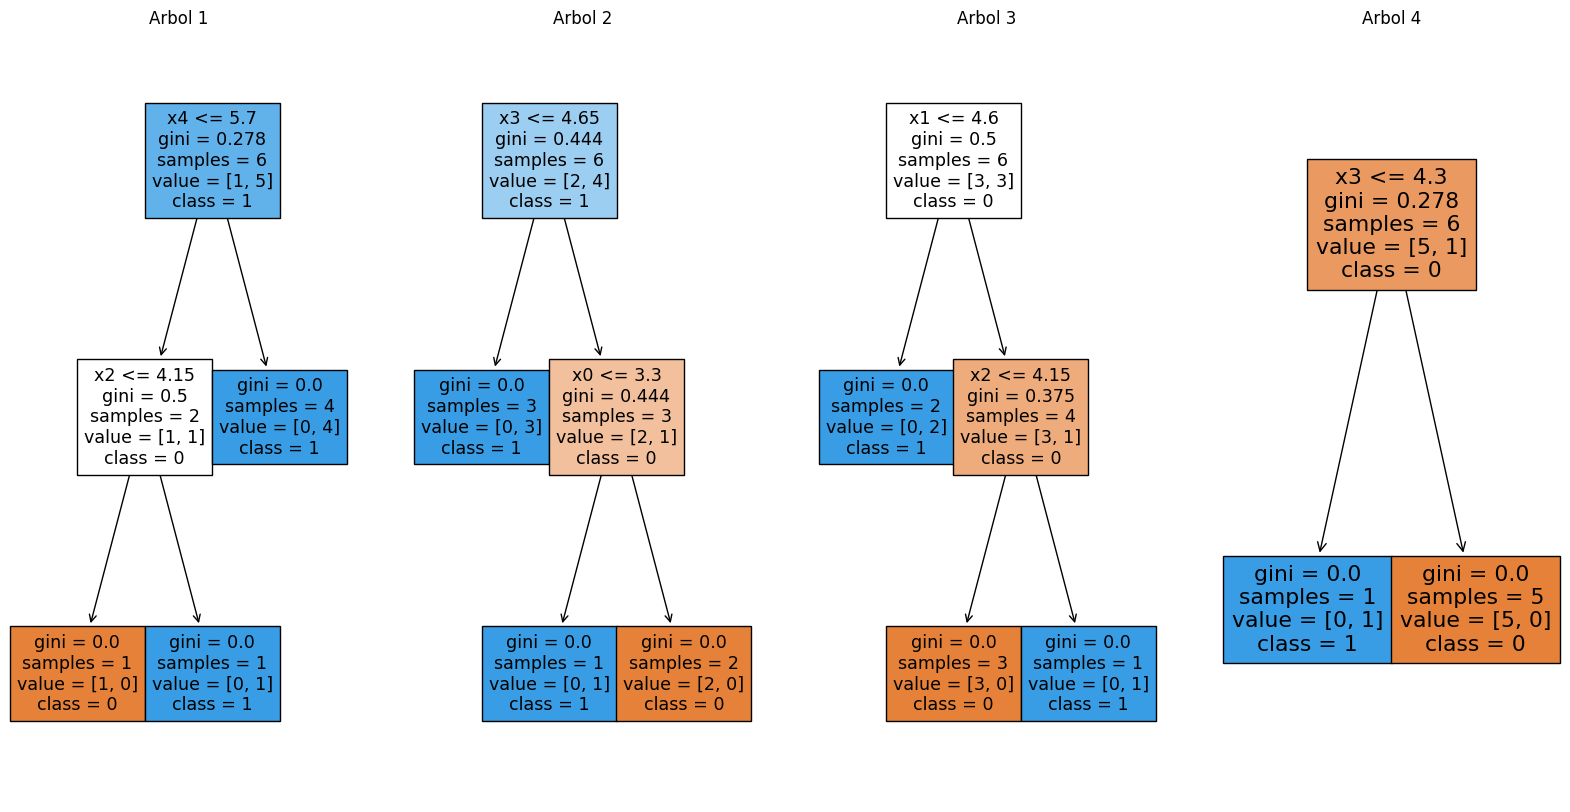

In [13]:
# Plot the decision trees
plt.figure(figsize=(20, 10))
for i, tree in enumerate(trees):
    plt.subplot(1, 4, i+1)
    plot_tree(tree, filled=True, feature_names=['x0', 'x1', 'x2', 'x3', 'x4'], class_names=['0', '1'])
    plt.title(f'Arbol {i+1}')
plt.show()

In [14]:
new_example = pd.DataFrame([[2.8, 6.2, 5.3, 4.4, 5.5]], columns=['x0', 'x1', 'x2', 'x3', 'x4'])

predictions = [tree.predict(new_example)[0] for tree in trees]
print("Predictions for each tree:", predictions)

final_prediction = max(set(predictions), key=predictions.count)
print("Final prediction:", final_prediction)

Predictions for each tree: [1, 1, 1, 0]
Final prediction: 1
